In [1]:
import datetime
import sys, os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import scanpy as sc
sc.logging.print_memory_usage()
sc.settings.verbosity = 2
sc.settings.set_figure_params(dpi = 300, dpi_save = 300)
sc.logging.print_header()

from matplotlib.pyplot import rc_context

Memory usage: current 0.21 GB, difference +0.21 GB
scanpy==1.10.2 anndata==0.10.8 umap==0.5.5 numpy==1.26.4 scipy==1.13.0 pandas==2.0.3 scikit-learn==1.4.2 statsmodels==0.14.2 igraph==0.11.6 pynndescent==0.5.13


In [3]:
# add the utility functions folder to PATH
sys.path.append(os.path.abspath("../packages"))
from db_dev.helper import *
from db_dev.plotting import *

In [4]:
import matplotlib as mpl
mpl.rc("font", family = "Arial")
mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42


In [5]:
#home_dir = os.path.expanduser("~")
current_directory = os.getcwd()
adata = sc.read_h5ad(current_directory+"/backups/bb2_bb3_leiden_2.5_sub_DGE_refined_annotation_86447x37733_241107_10h51.h5ad")

In [6]:
#Loading obs
current_directory = os.getcwd()
# overwrite obs with the most recent version
filename = current_directory+"/backups/anno_obs_info_86447x39_250127_18h19.npz"
encoding = "latin1"

with np.load(filename, encoding=encoding, allow_pickle = True) as f:
    obs = pd.DataFrame(**f)


obs_cell_type_sub_prolif_anno = obs[["barcode", "library", "cell_type_sub_prolif_anno"]]

# Perform a left join
updated_obs = adata.obs.merge(obs_cell_type_sub_prolif_anno, on=["library", "barcode"], how="left")

# Update the adata.obs with the new annotations
adata.obs = updated_obs




In [9]:
neutrophils = [
"Aged Neutrophils",
"Mature Neutrophils",
"Immature Neutrophils",
"Early Immature Neutrophils",
"Precursors of Neutrophils"
]

In [10]:
## Z-scale 
adata.layers["scaled"] = sc.pp.scale(adata, copy = True).X 


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/Users/denis/mambaforge/envs/capseq_dge/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [11]:
primary_granules = ["MPO", "ELANE", "CTSG", "PRTN3", "AZU1"] 
secondary_granules = ["CAMP", "LTF", "LCN2", "CEACAM1", "OLFM4"] 
tertiary_granules = ["ARG1", "MMP8", "ITGAM", "MMP9", "ADAM8"] 

aged_neutrophils = ["PI3", "SLPI", "SIGLEC10", "CXCR4", "ADGRE2",]
mature_neutrophils = ["CXCR2", "CXCR1", "CSF3R", "FCGR3B", "NAMPT"]
imm_neutrophils = ["MMP9", "S100A12", "CD177", "CST7", "ORM1"] 
earlyimm_neutrophils = ["CAMP", "LTF", "MMP8", "LCN2", "CEACAM8"] 
precursor_neutrophils = ["MPO", "AZU1", "ELANE", "MKI67", "DEFA4"]

neutrophils_marker_genes_dict = {
    "Aged\nNeutrophils": aged_neutrophils,
    "Mature\nNeutrophils": mature_neutrophils,
    "Immature\nNeutrophils": imm_neutrophils,
    "Early Immature\nNeutrophils": earlyimm_neutrophils,
    "Precursors of\nNeutrophils": precursor_neutrophils
}


neutrophils_marker_genes_dict_HD = {
    "Aged\nNeutrophils": aged_neutrophils,
    "Mature\nNeutrophils": mature_neutrophils,
    "Immature\nNeutrophils": imm_neutrophils,
    #"Early Immature\nNeutrophils": earlyimm_neutrophils,
    #"Precursors of\nNeutrophils": precursor_neutrophils
}


neutrophils_granules_genes_dict = {
    "Primary\nGranules": primary_granules,
    "Secondary\nGranules": secondary_granules,
    "Tertiary\nGranules": tertiary_granules
}


In [14]:
# 
neutrophils = [
"Aged Neutrophils",
"Mature Neutrophils",
"Immature Neutrophils",
"Early Immature Neutrophils",
"Precursors of Neutrophils"
]

neutrophils_HD = [
"Aged Neutrophils",
"Mature Neutrophils",
"Immature Neutrophils"
]


neutrophils_subset = [neutrophils, neutrophils, neutrophils, neutrophils_HD]

neutrophils_masks = [(adata.obs["cell_type_sub_prolif_anno"].isin(neutrophils)) & ((adata.obs["sample"] == "GF") | (adata.obs["sample"] == "KC")),
                    (adata.obs["cell_type_sub_prolif_anno"].isin(neutrophils)) & ((adata.obs["sample"] == "GF")),
                    (adata.obs["cell_type_sub_prolif_anno"].isin(neutrophils)) & ((adata.obs["sample"] == "UL")),
                    (adata.obs["cell_type_sub_prolif_anno"].isin(neutrophils_HD)) & ((adata.obs["sample"] == "KC"))]

cohorts_subset = ["only_GCSF_and_HD", "only_GCSF", "only_AML", "only_HD"]


neutrophils_marker_genes_dicts = [neutrophils_marker_genes_dict, neutrophils_marker_genes_dict, neutrophils_marker_genes_dict, neutrophils_marker_genes_dict_HD]

/Users/denis/mambaforge/envs/capseq_dge/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/denis/mambaforge/envs/capseq_dge/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/denis/mambaforge/envs/capseq_dge/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/denis/mambaforge/envs/capseq_dge/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


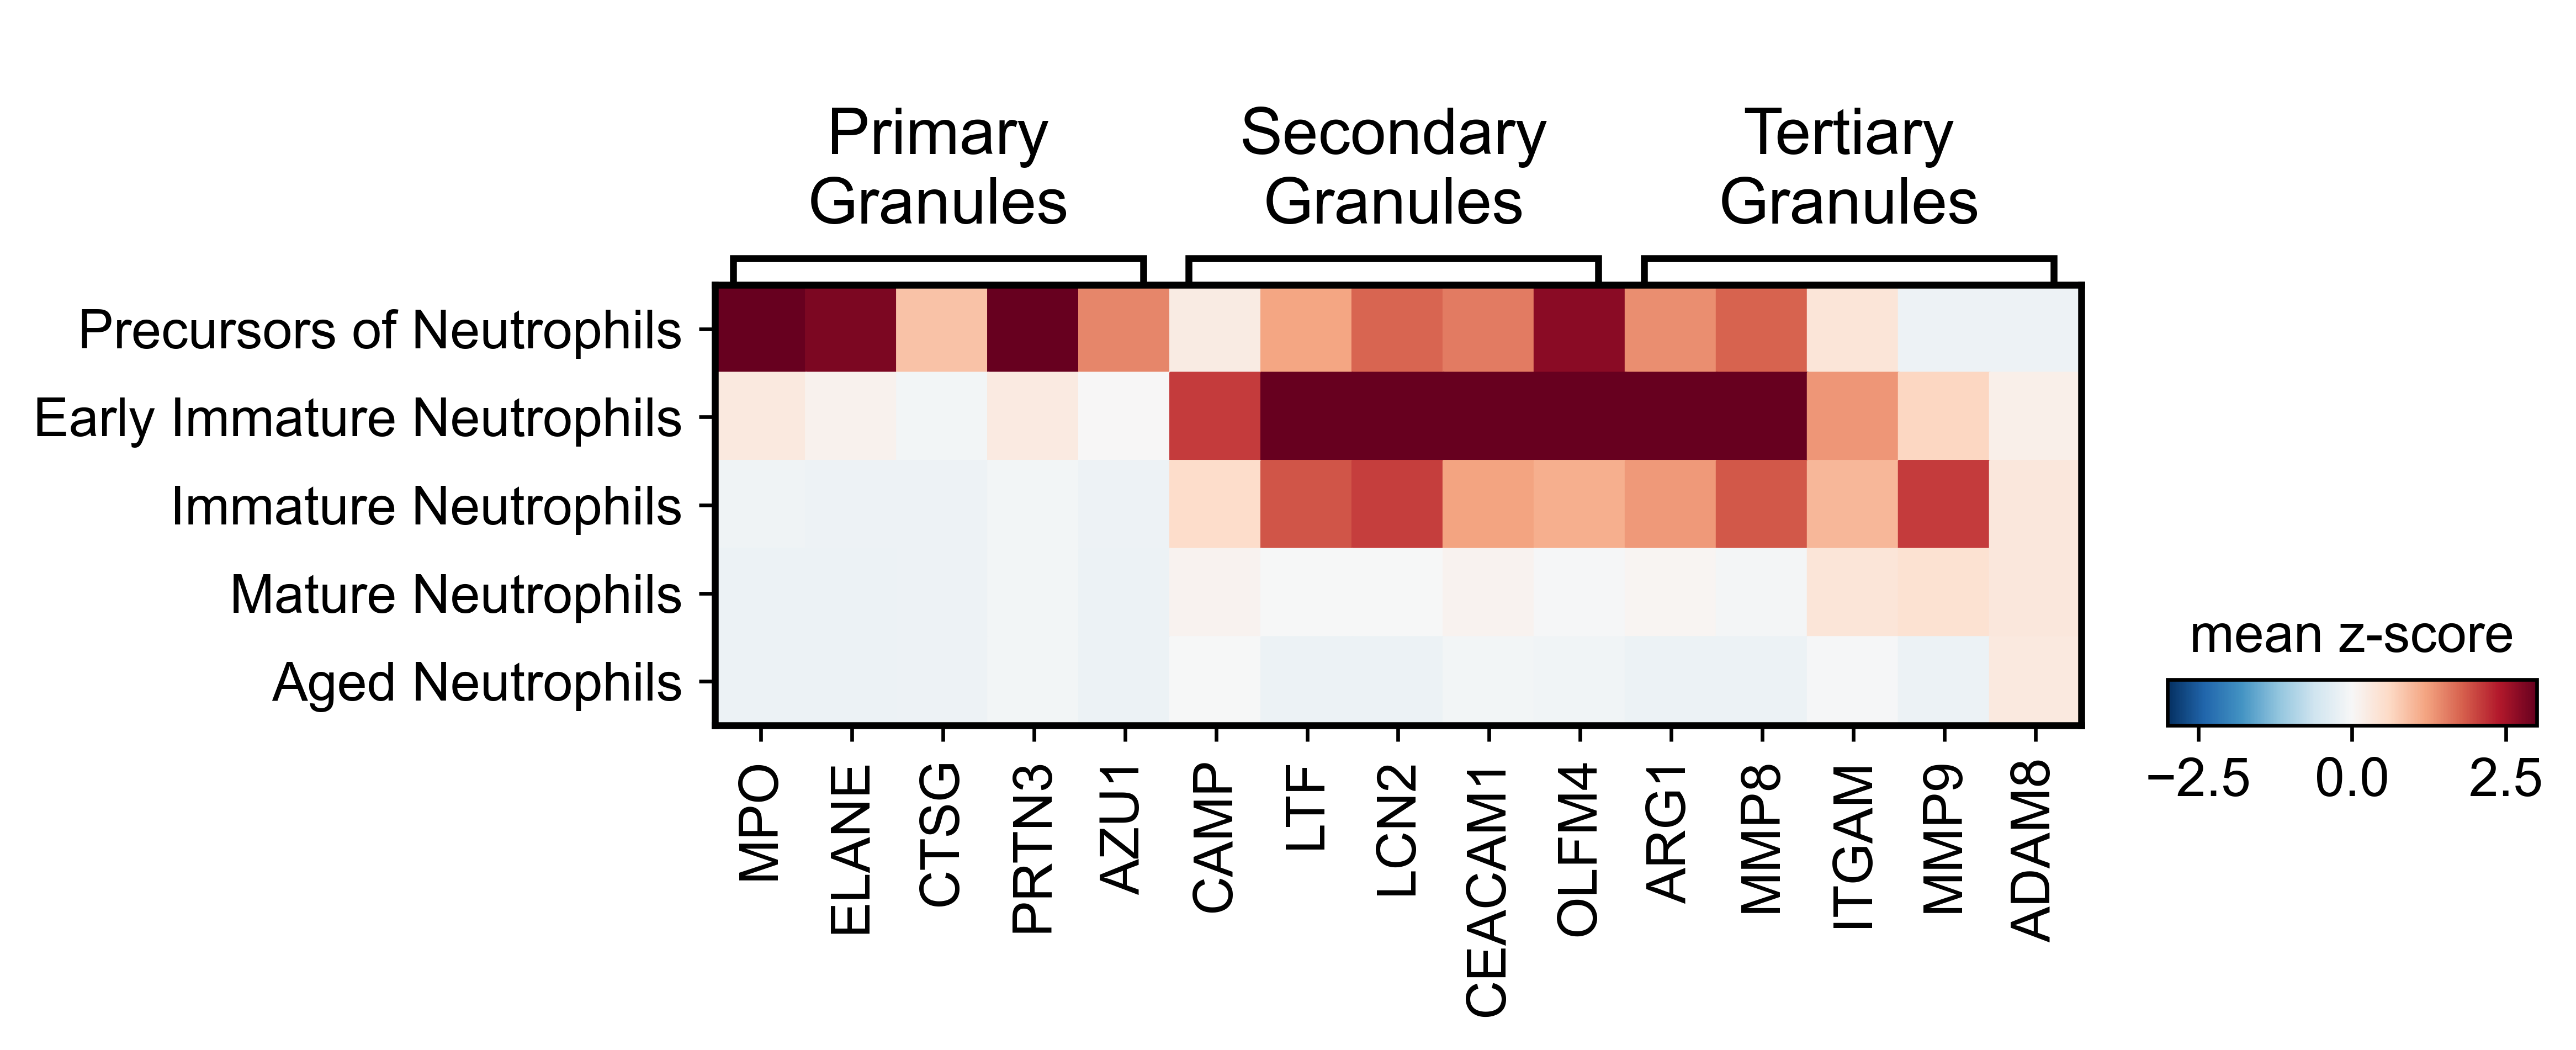

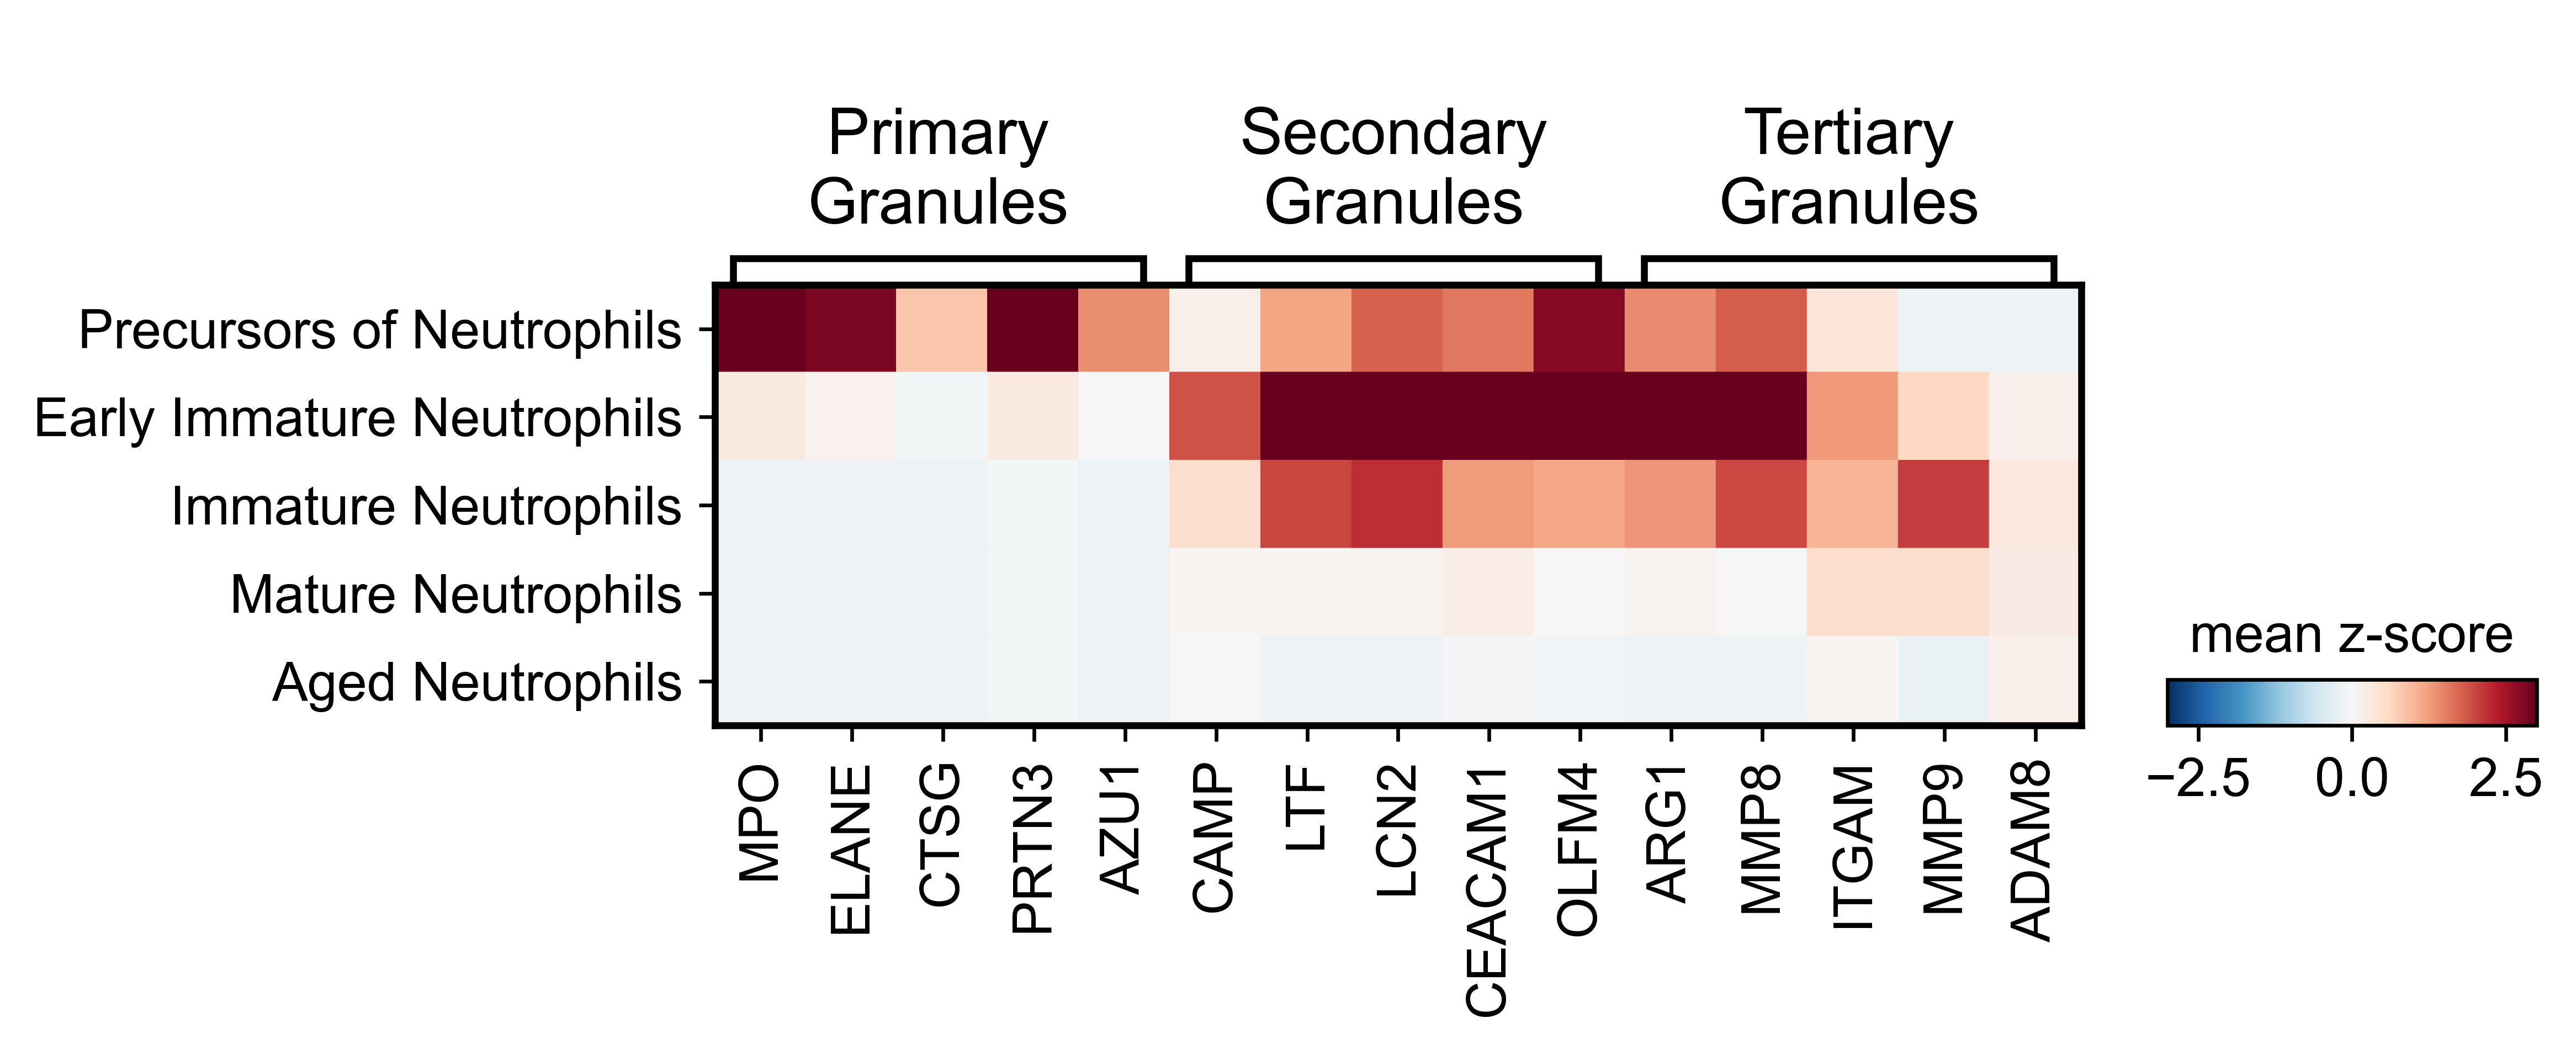

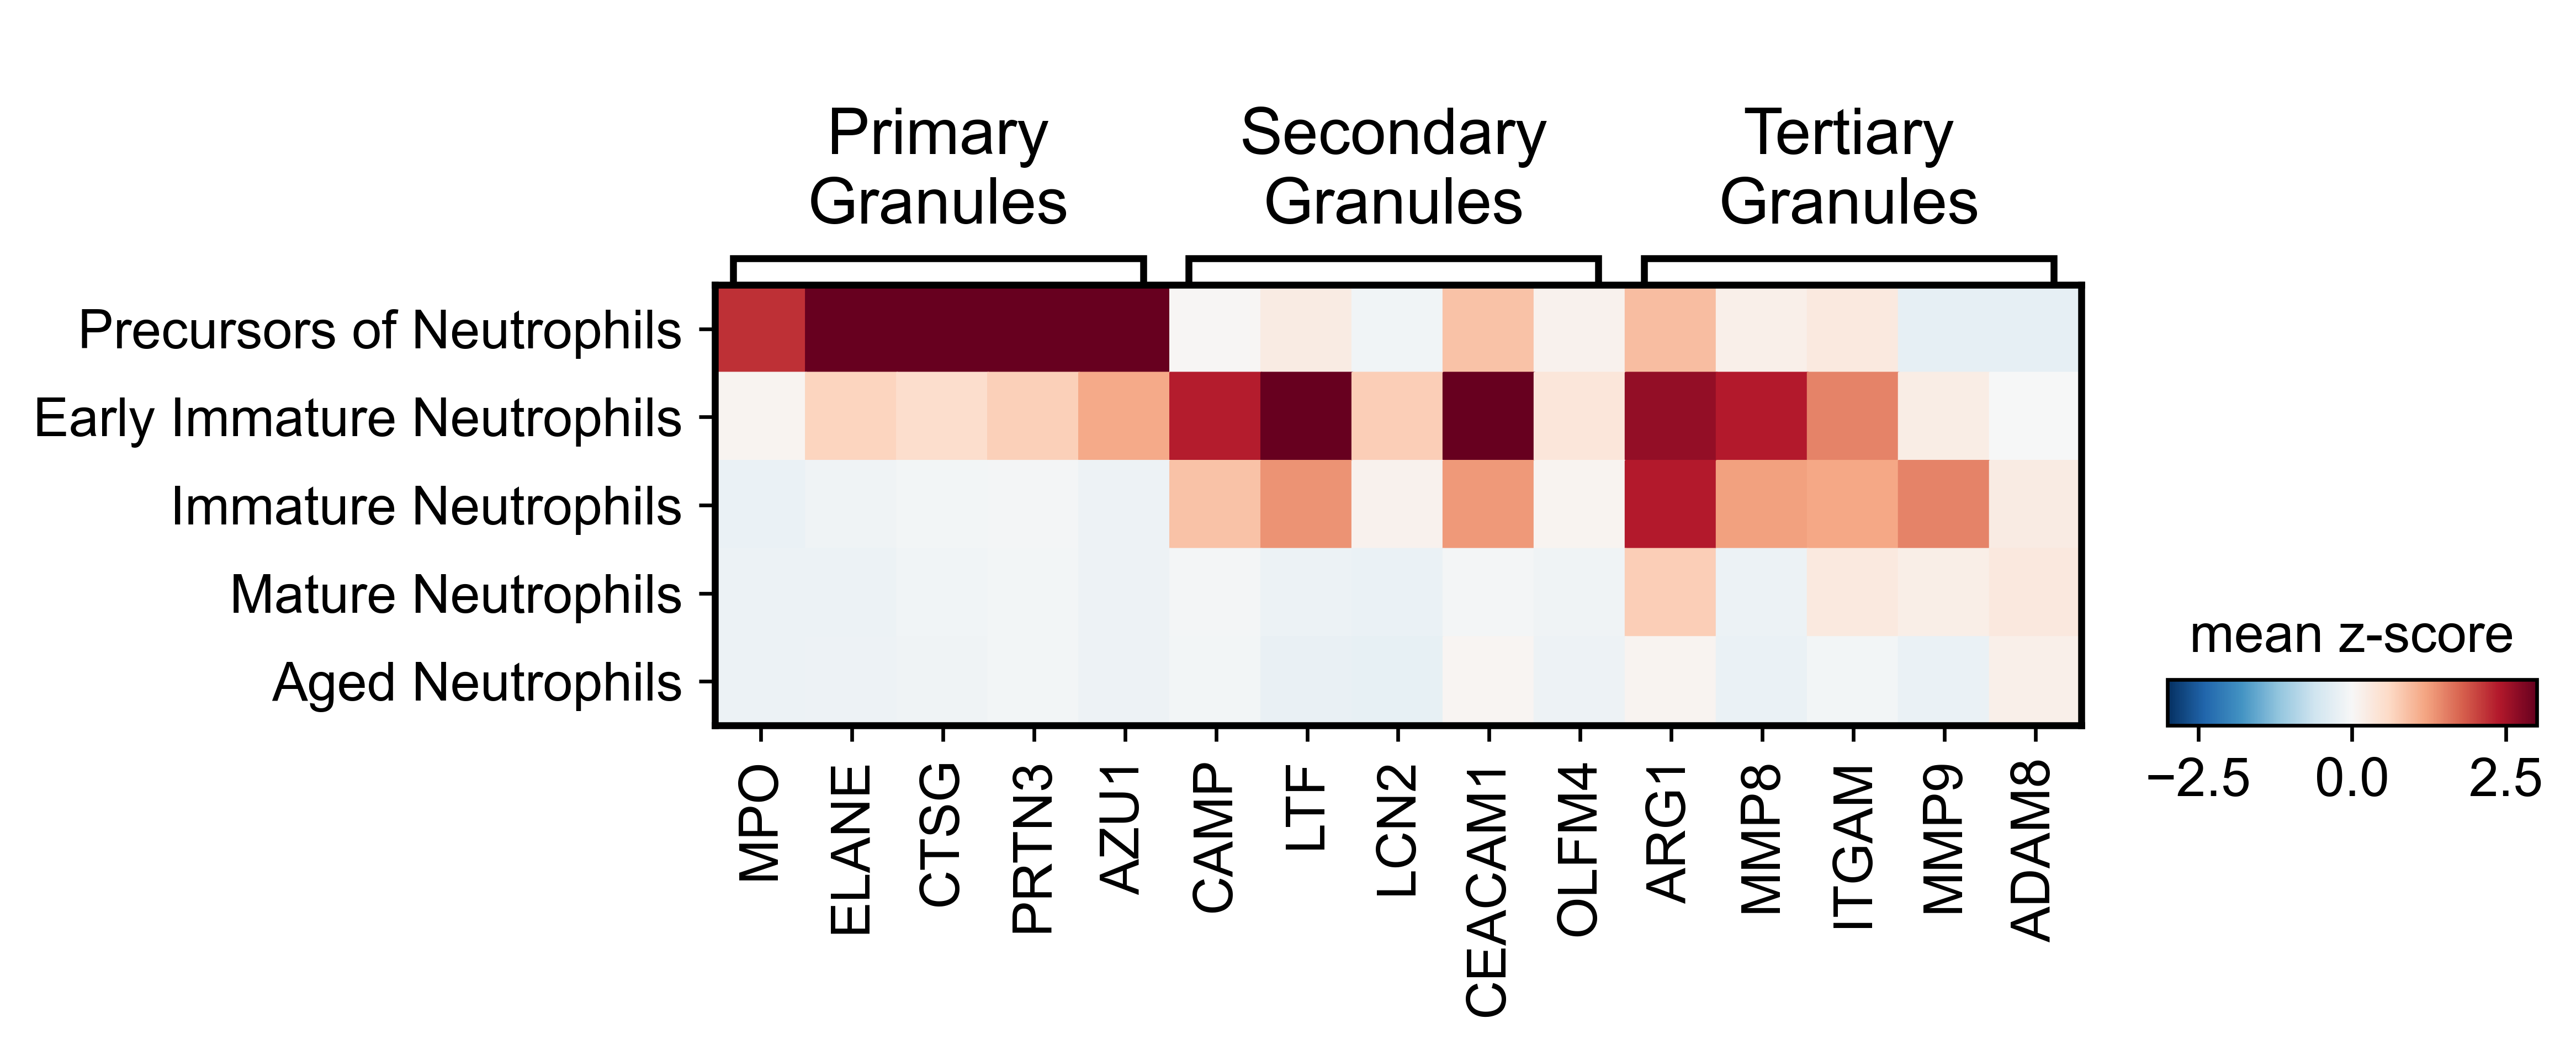

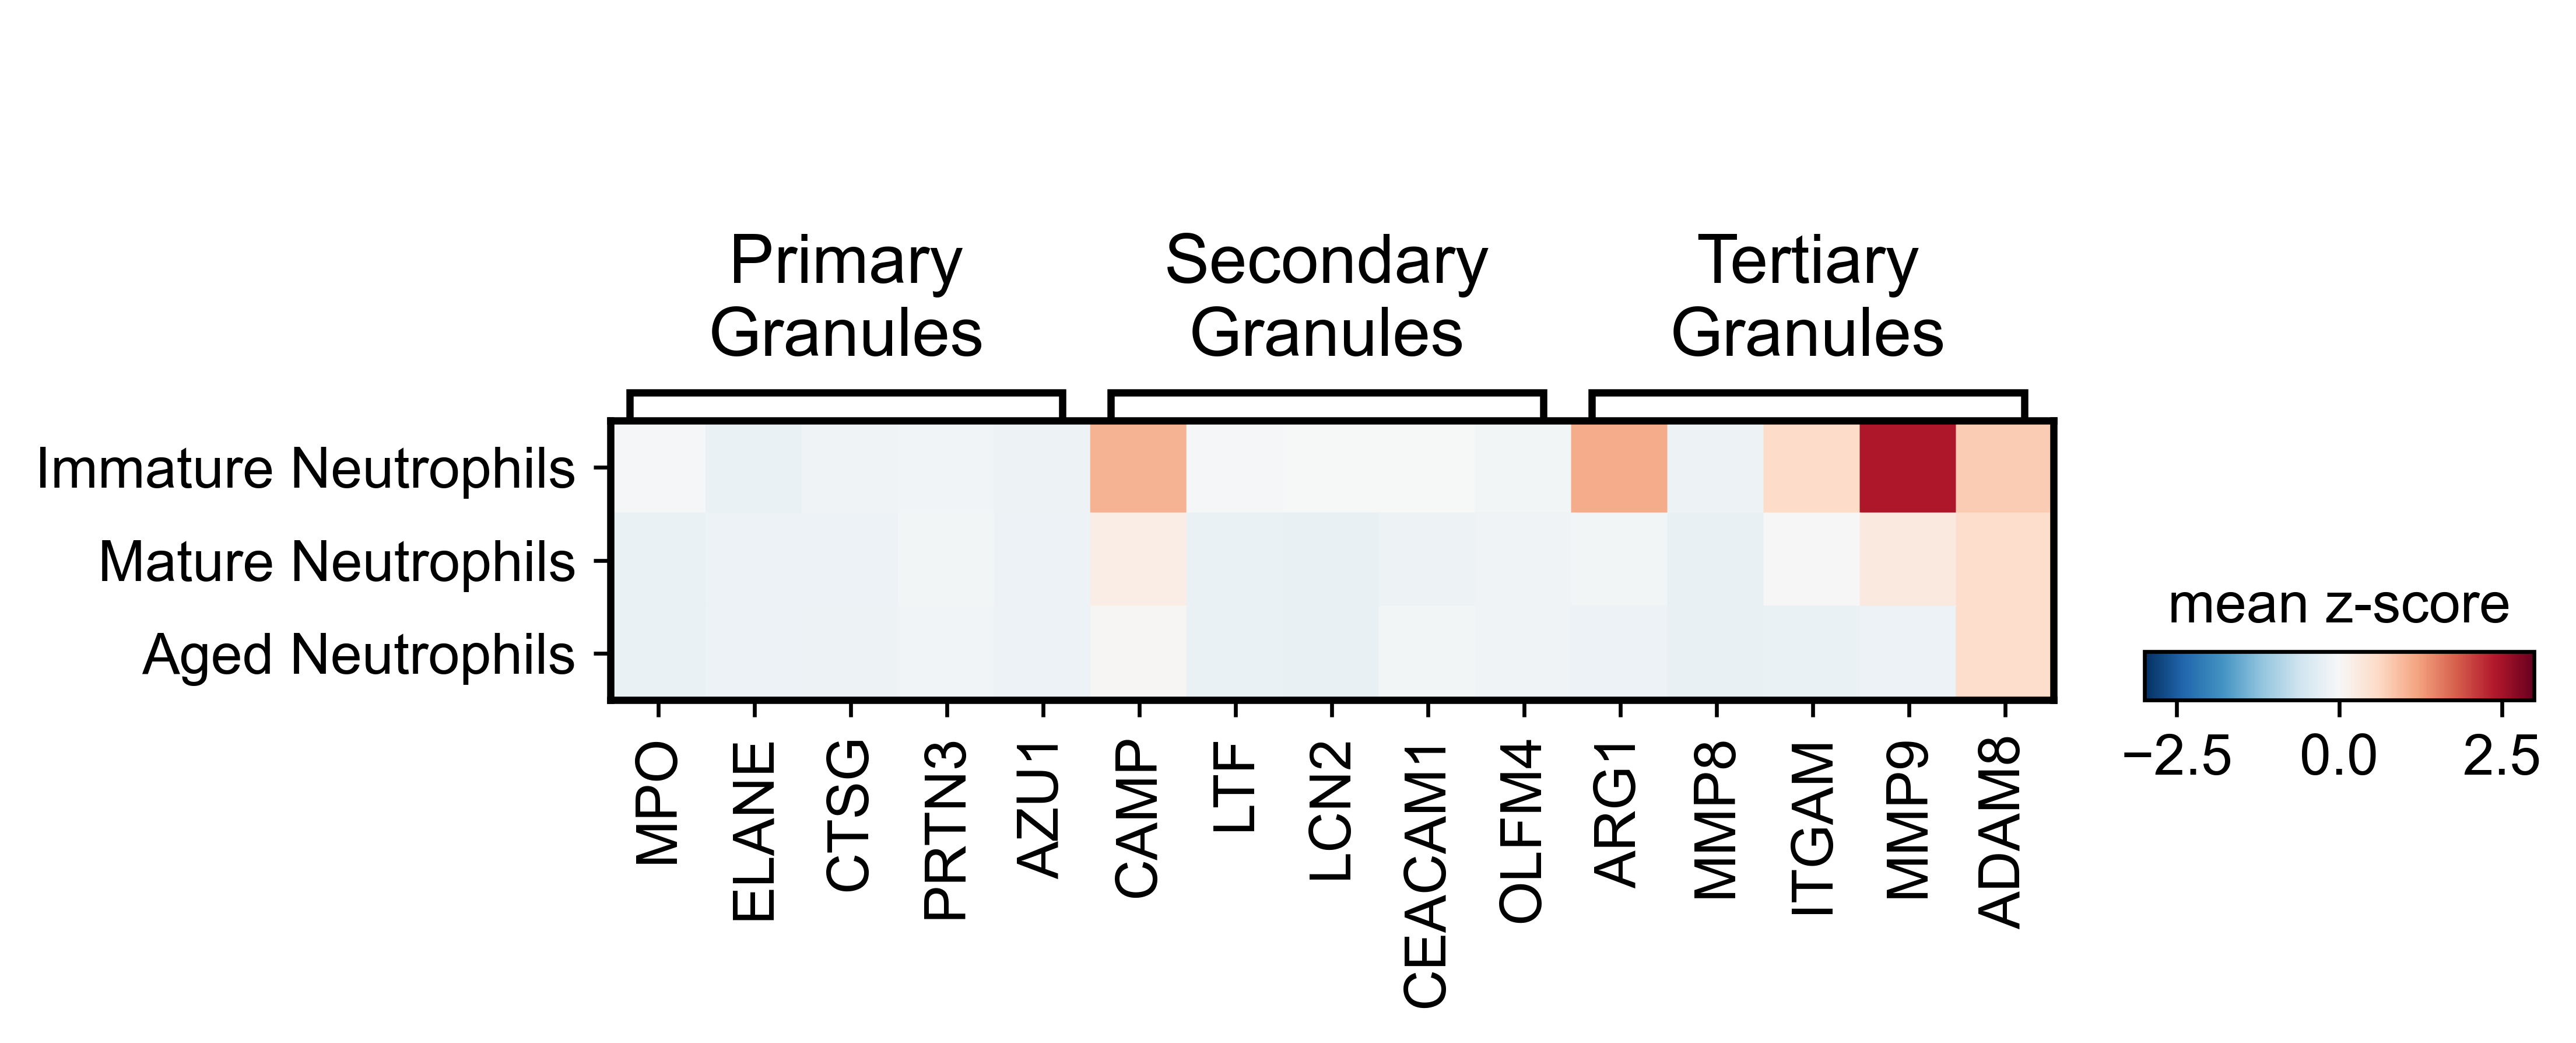

In [17]:
import matplotlib


for subset, mask, cohort in zip(neutrophils_subset, neutrophils_masks, cohorts_subset):

    adata_neutrophils = adata[mask].copy() 

    fig = sc.pl.matrixplot(
        adata_neutrophils,
        neutrophils_granules_genes_dict,
        categories_order = subset[::-1],
        groupby = "cell_type_sub_prolif_anno",
        dendrogram=False,
        vmin = -3, 
        vmax = 3,
        cmap="RdBu_r",
        var_group_rotation = 0,
        layer="scaled",
        colorbar_title = "mean z-score",
        return_fig = True
    )
    
    axes_dict = fig.get_axes()
    

    mainplot_ax = axes_dict["mainplot_ax"]
    color_legend_ax = axes_dict["color_legend_ax"]
    gene_group_ax = axes_dict["gene_group_ax"]
    
    for child in mainplot_ax.get_children():
        if isinstance(child, matplotlib.collections.PolyQuadMesh):
            child.set_edgecolor("face")  
            child.set_linewidth(0.5)  

    for ax in axes_dict.values():
        ax.grid(False) 
    
    plt.savefig(f"figures/final/matrixplot_{cohort}_neutrophils_granules_zscore_v1.pdf", transparent = True, bbox_inches="tight")
    

/Users/denis/mambaforge/envs/capseq_dge/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/denis/mambaforge/envs/capseq_dge/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/denis/mambaforge/envs/capseq_dge/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/denis/mambaforge/envs/capseq_dge/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


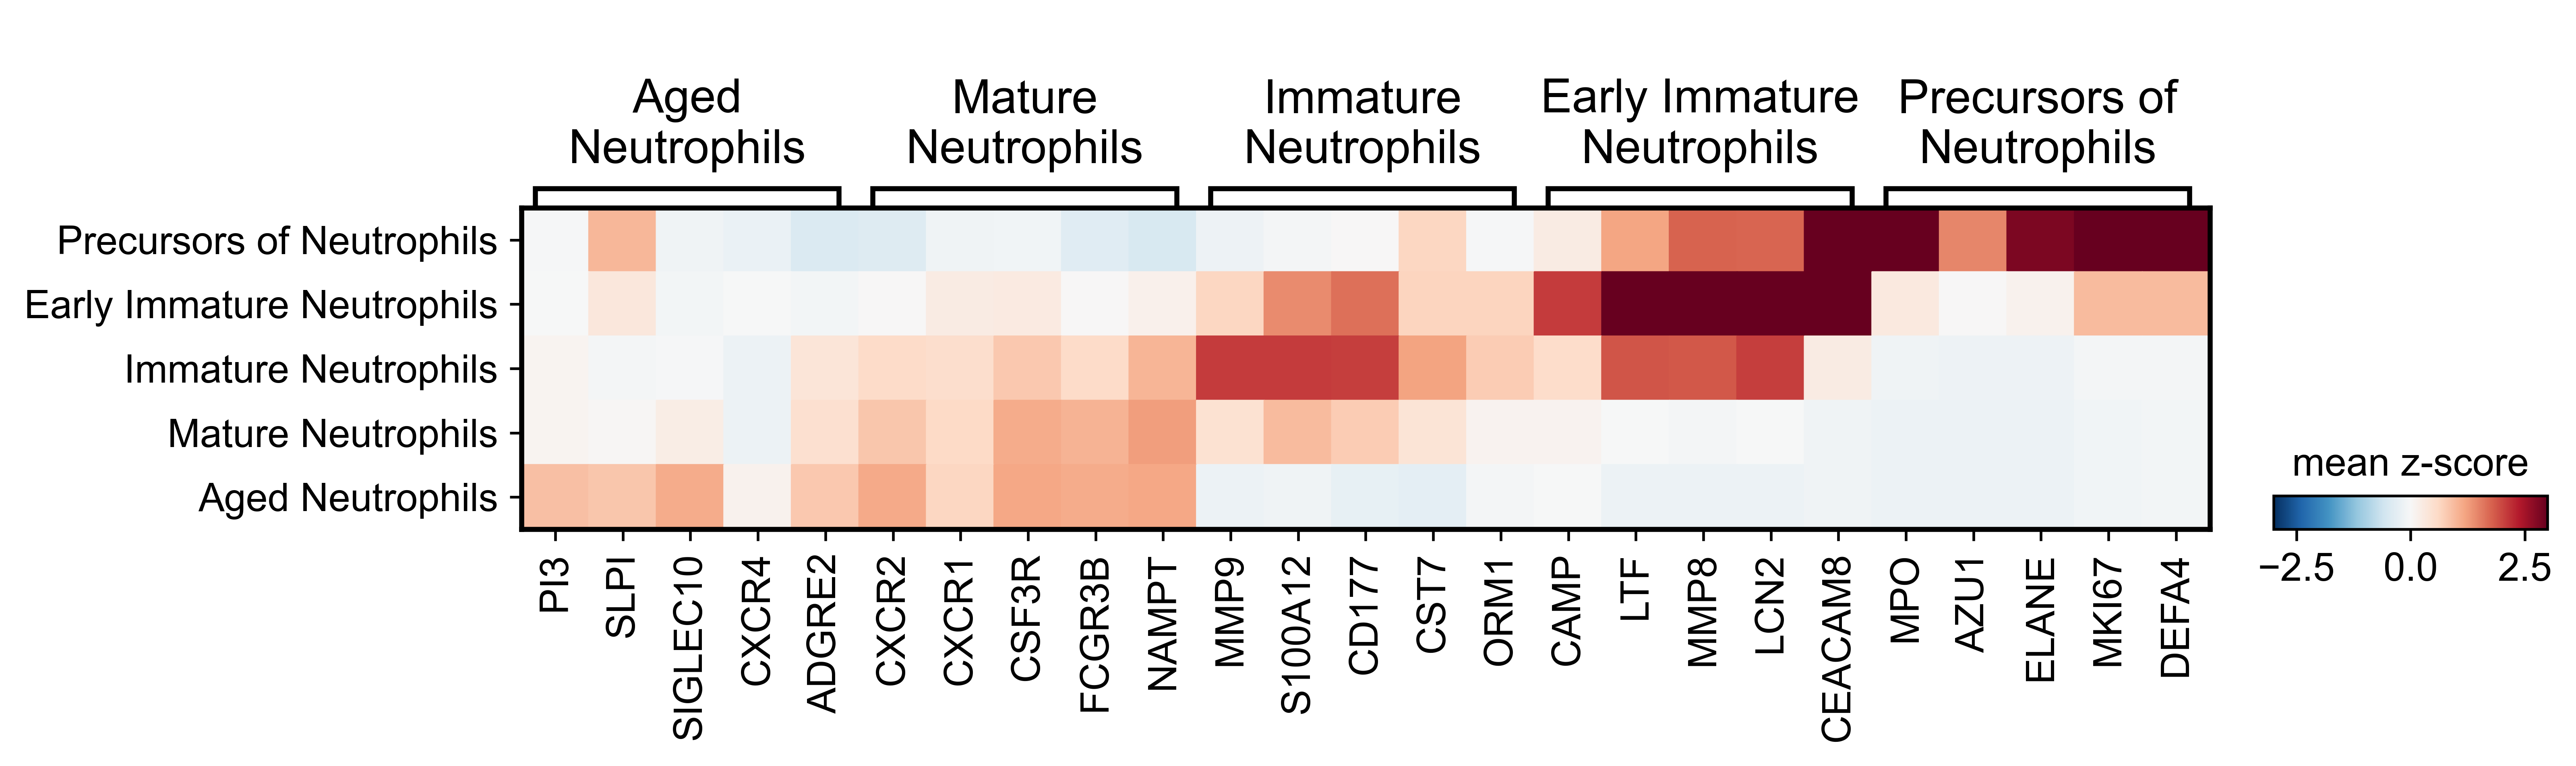

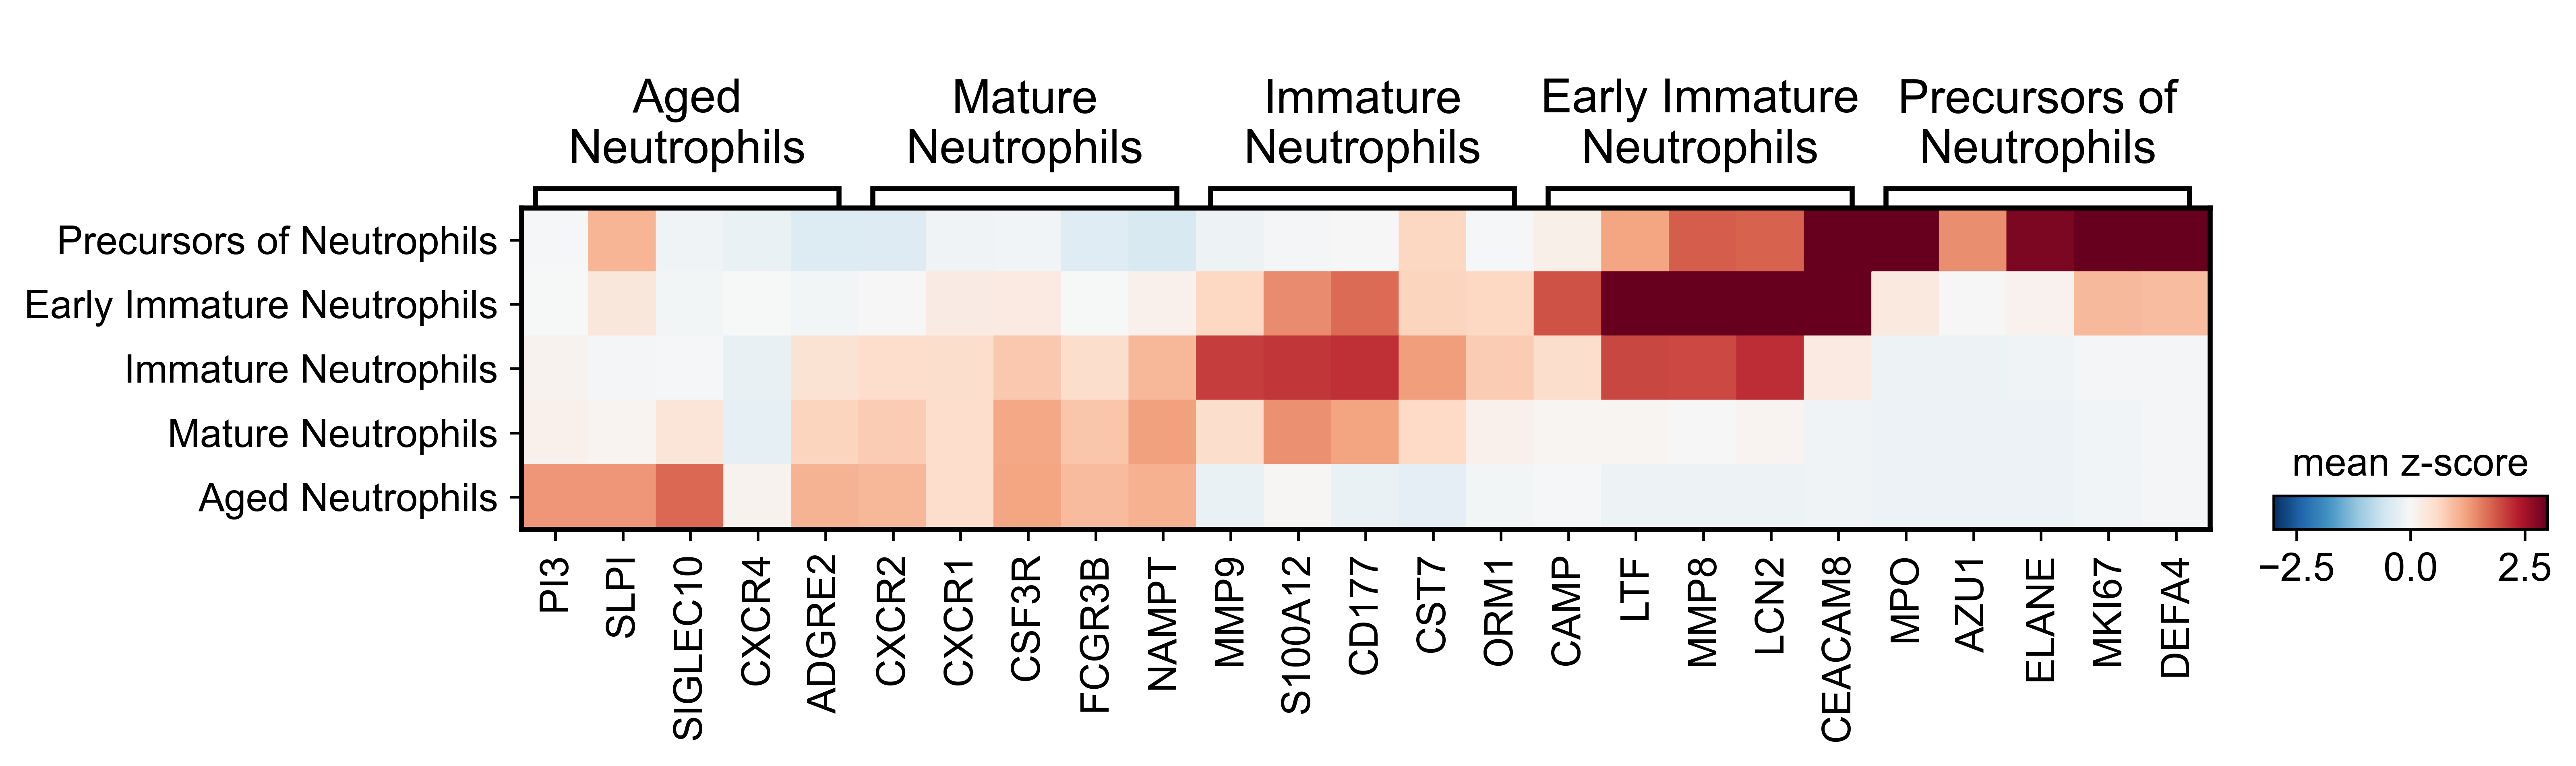

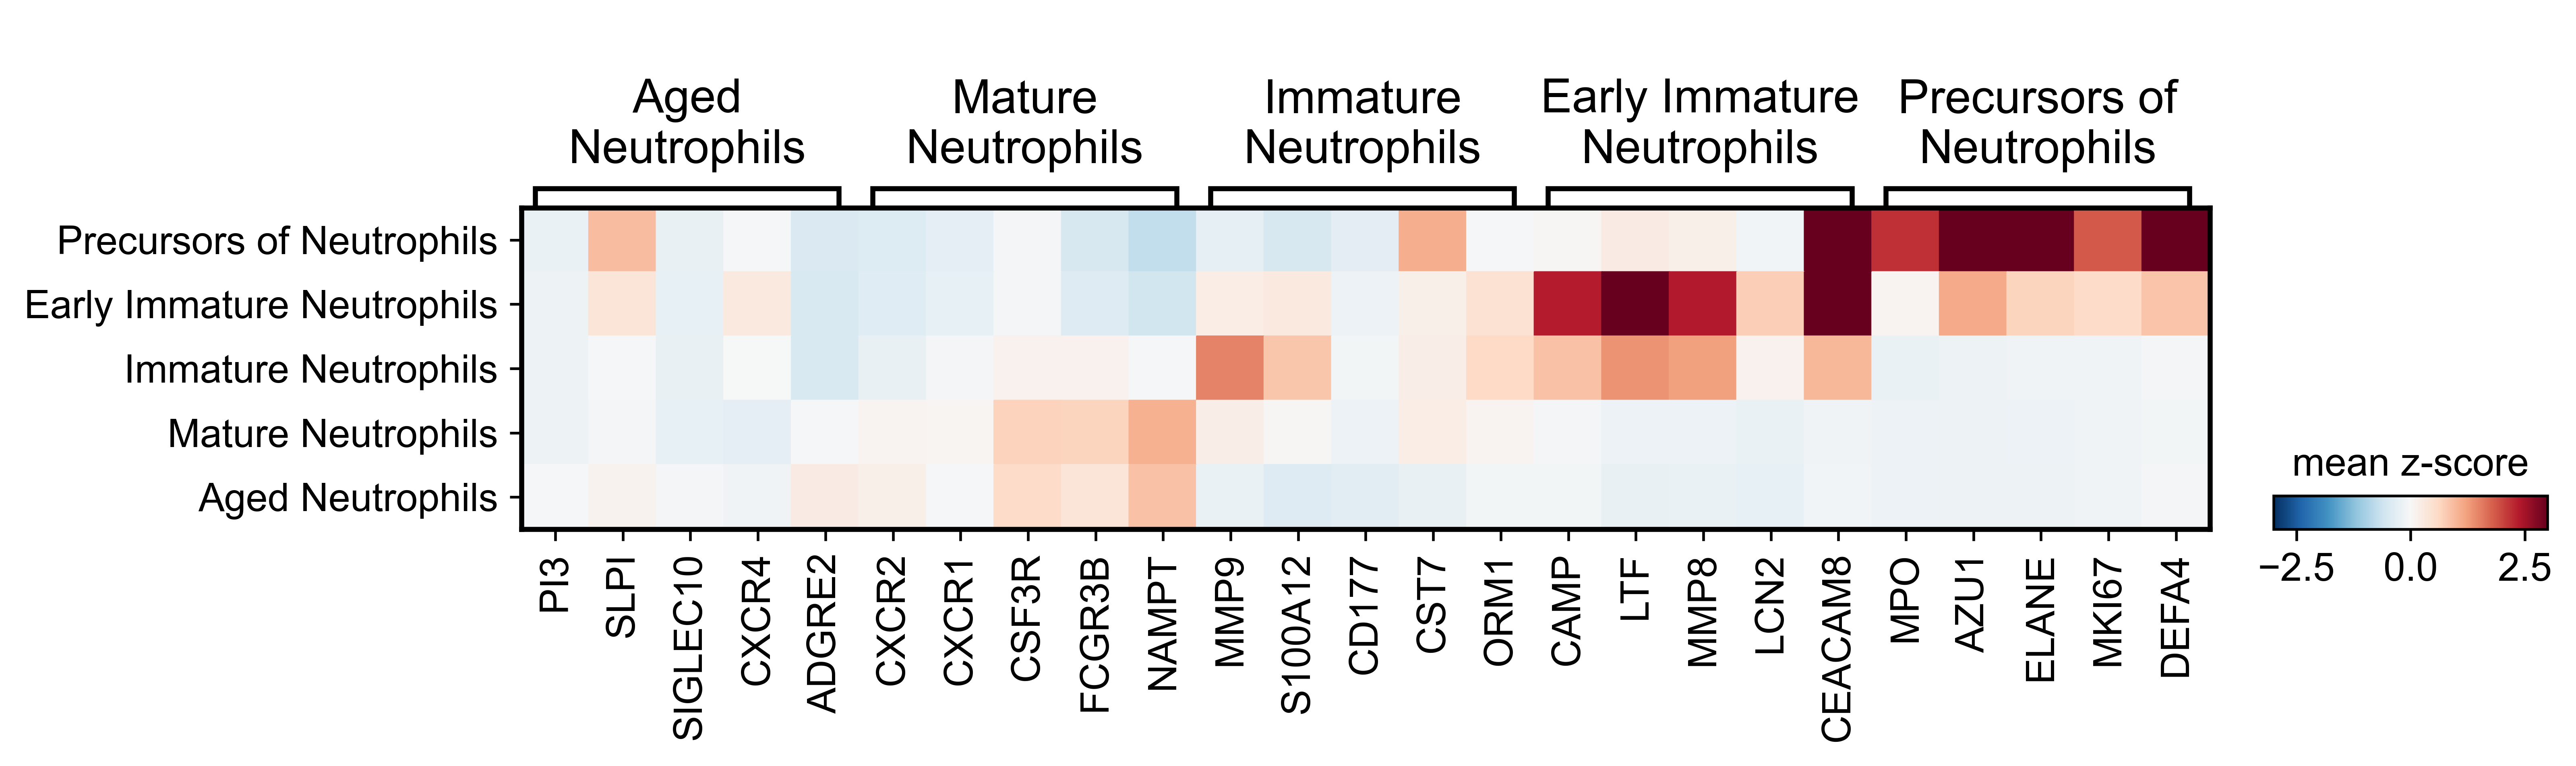

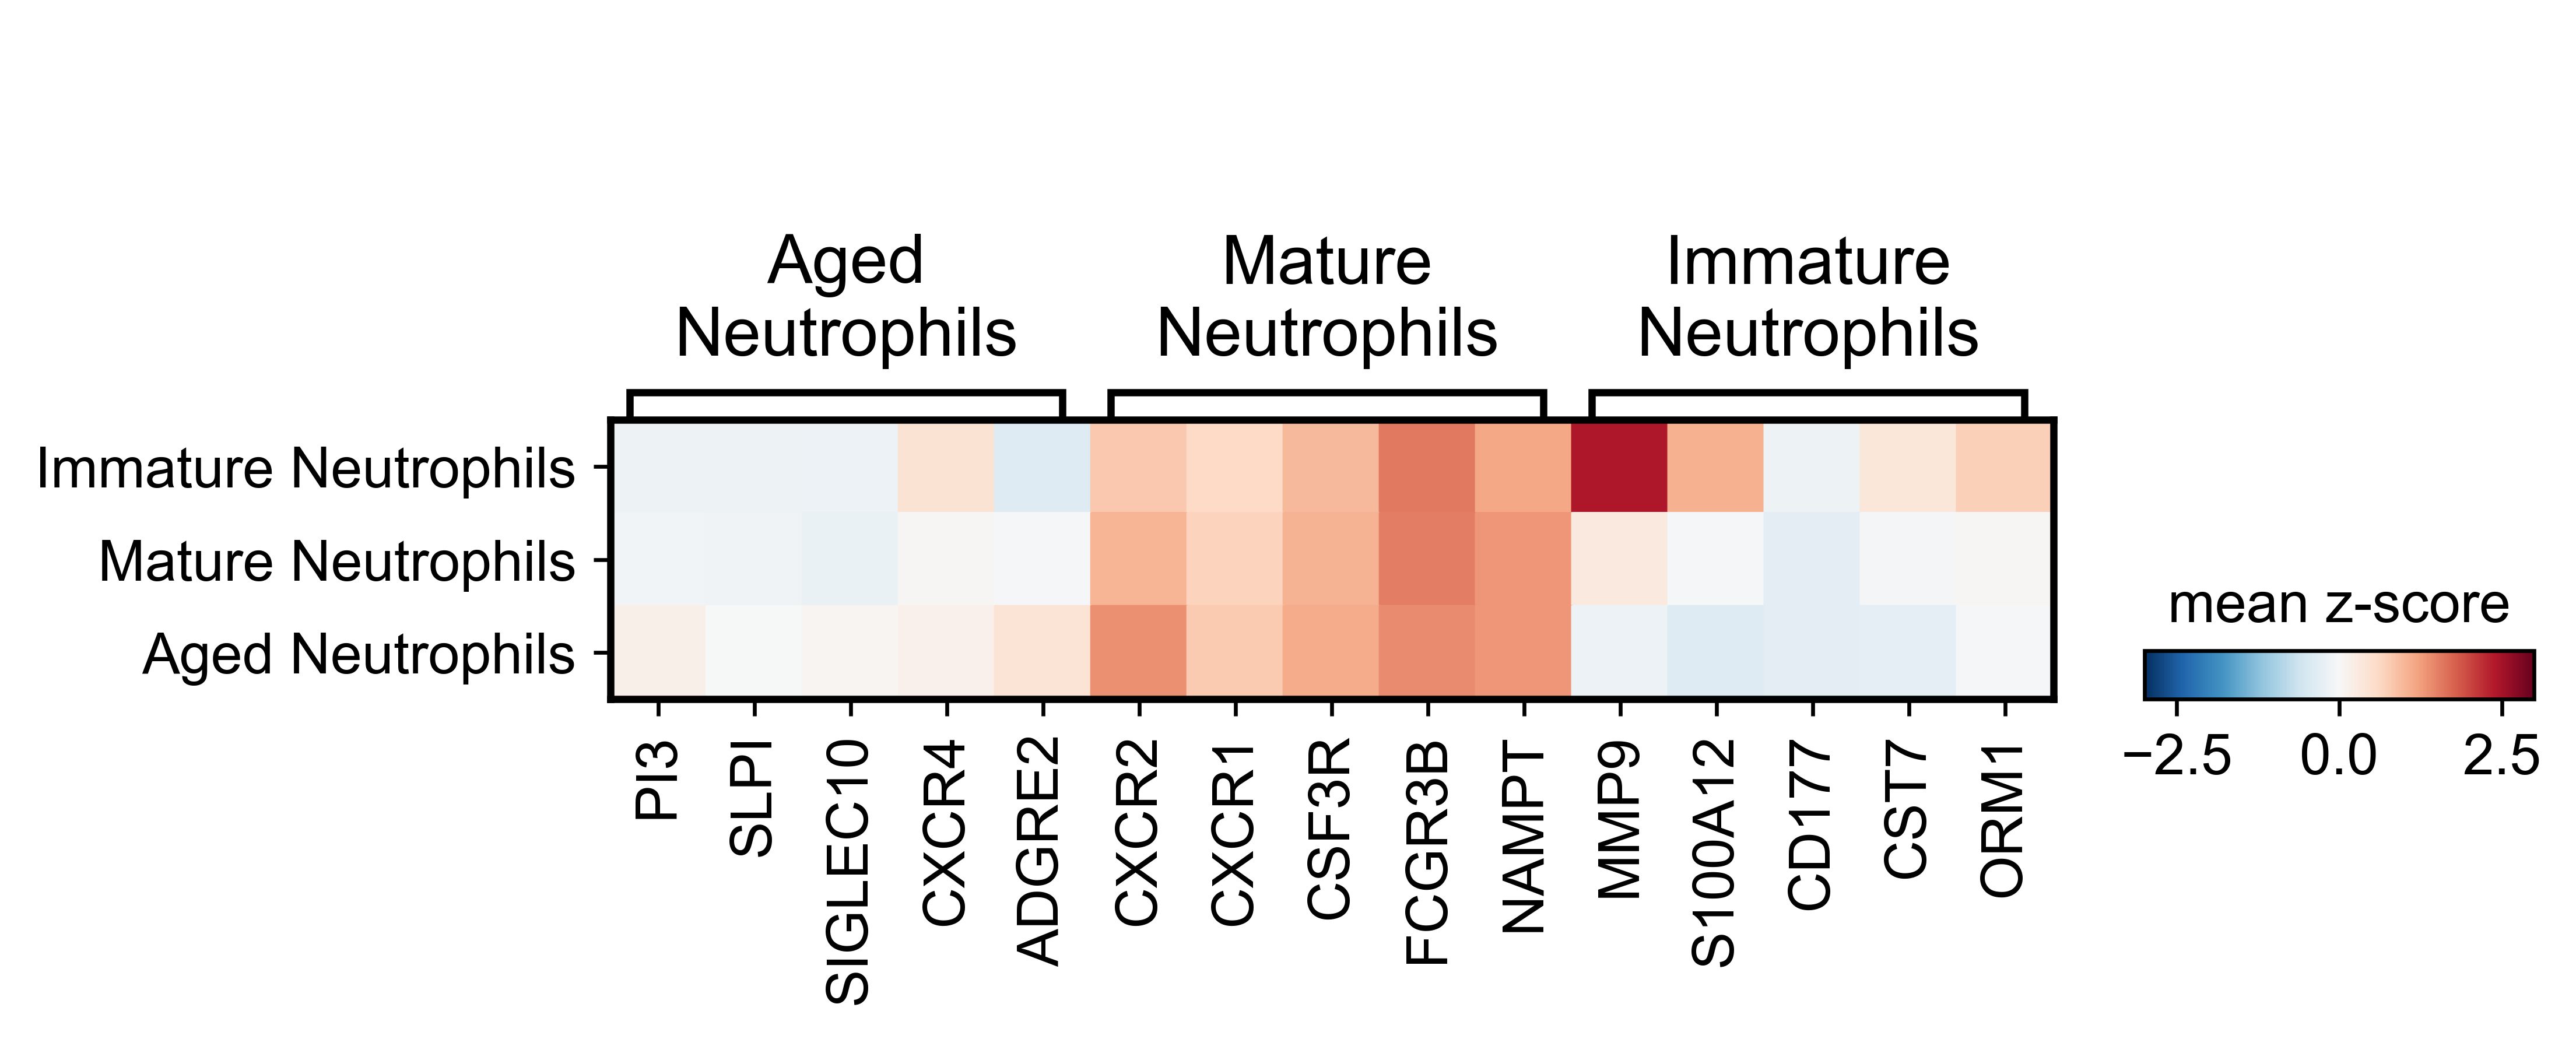

In [24]:
import matplotlib


for subset, mask, cohort, marker_genes_dict in zip(neutrophils_subset, neutrophils_masks, cohorts_subset, neutrophils_marker_genes_dicts):

    adata_neutrophils = adata[mask].copy() 

    fig = sc.pl.matrixplot(
        adata_neutrophils,
        marker_genes_dict,
        categories_order = subset[::-1],
        groupby = "cell_type_sub_prolif_anno",
        dendrogram=False,
        vmin = -3, 
        vmax = 3,
        cmap="RdBu_r",
        var_group_rotation = 0,
        layer="scaled",
        colorbar_title = "mean z-score",
        return_fig = True 
    )
    
    axes_dict = fig.get_axes()
    
    mainplot_ax = axes_dict["mainplot_ax"]
    color_legend_ax = axes_dict["color_legend_ax"]
    gene_group_ax = axes_dict["gene_group_ax"]
    
    for child in mainplot_ax.get_children():
        if isinstance(child, matplotlib.collections.PolyQuadMesh):
            child.set_edgecolor("face")  
            child.set_linewidth(0.5)  

    for ax in axes_dict.values():
        ax.grid(False) 
    
    plt.savefig(f"figures/final/matrixplot_{cohort}_neutrophils_markers_zscore_v1.pdf", transparent = True, bbox_inches="tight")
    

/Users/denis/mambaforge/envs/capseq_dge/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/denis/mambaforge/envs/capseq_dge/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/denis/mambaforge/envs/capseq_dge/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/denis/mambaforge/envs/capseq_dge/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


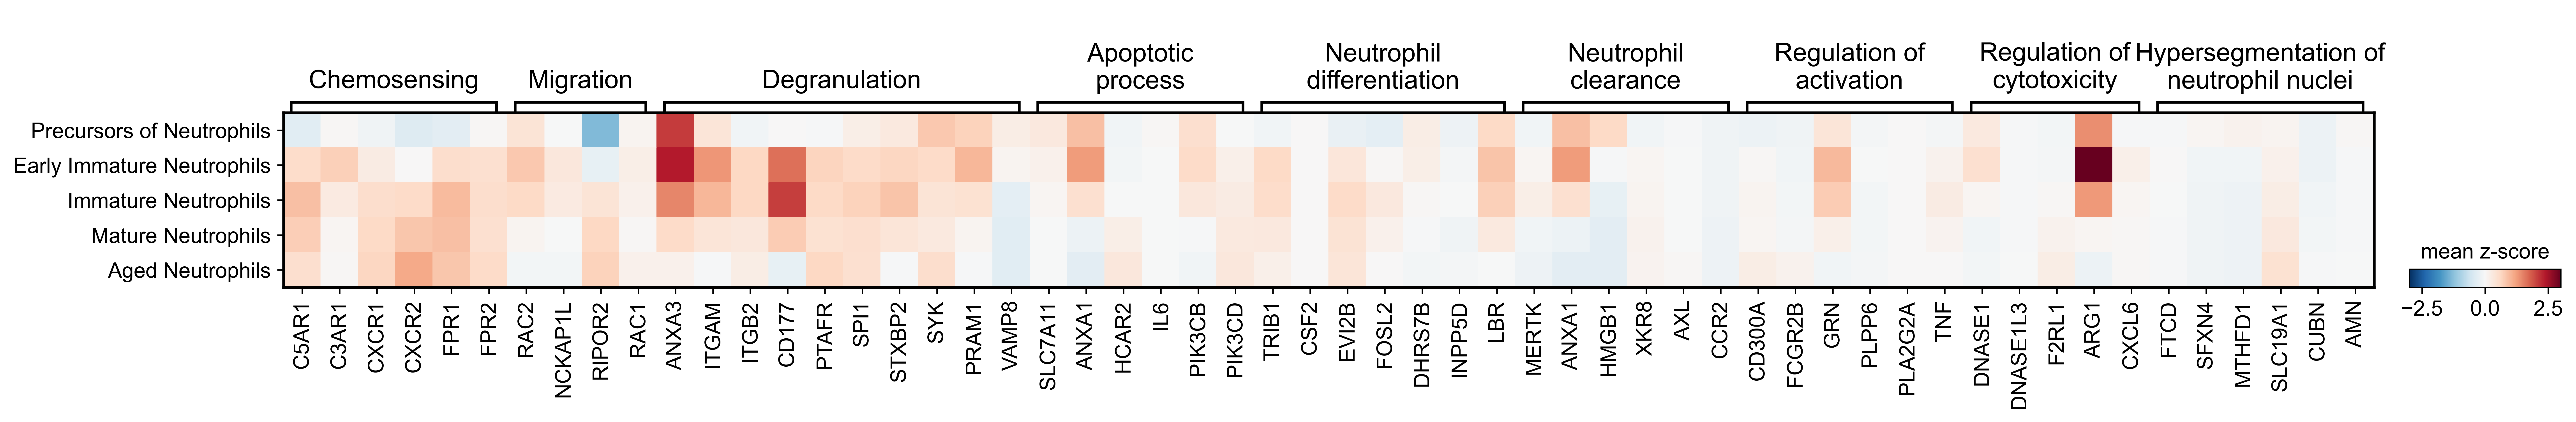

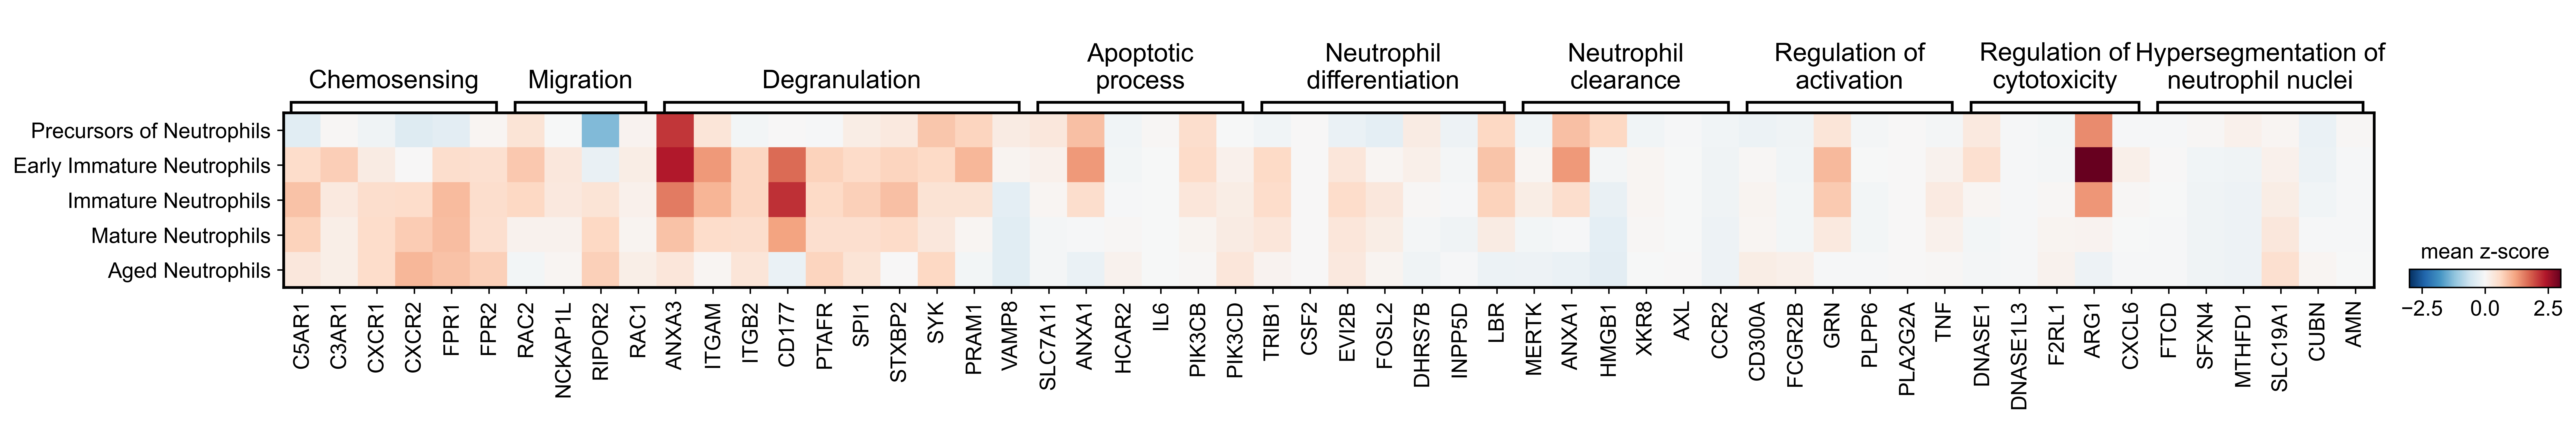

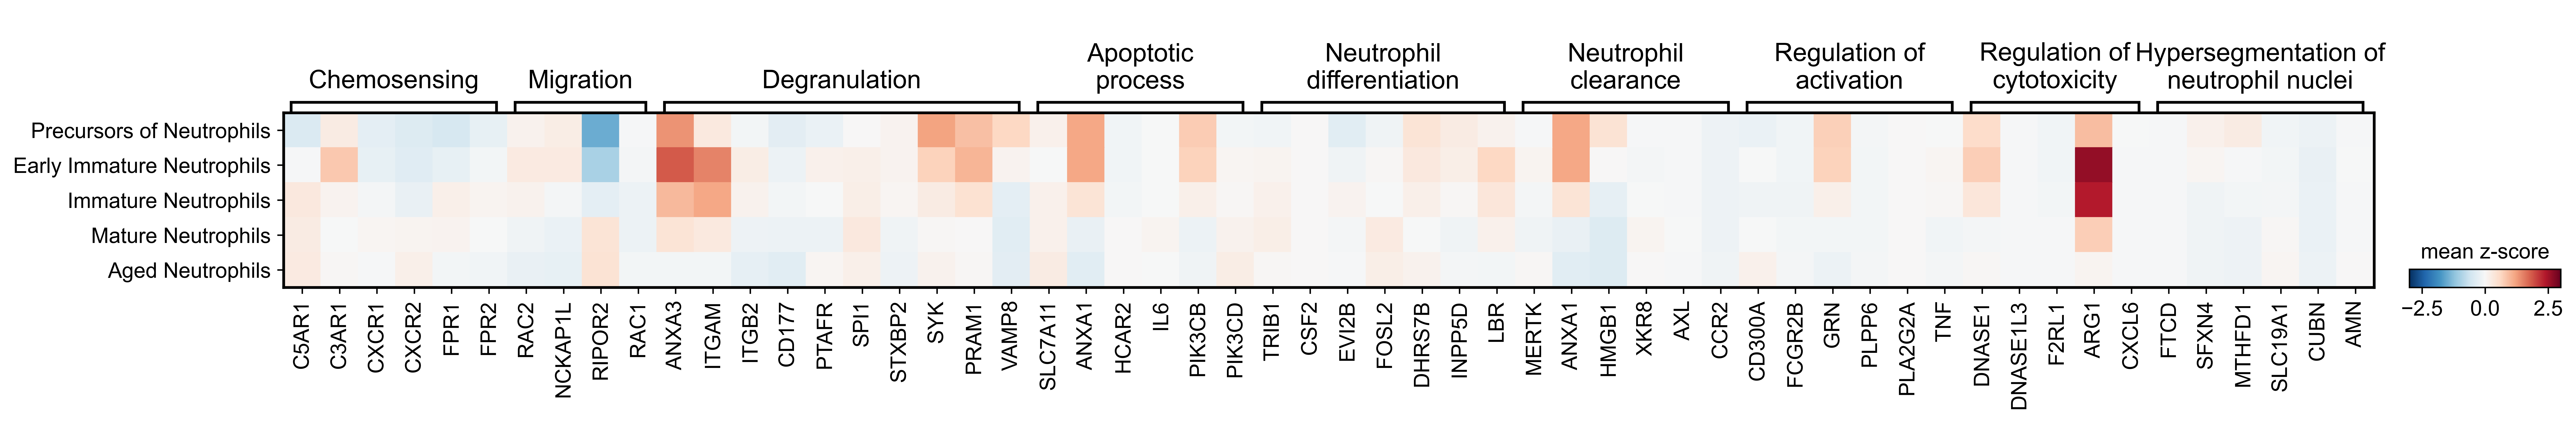

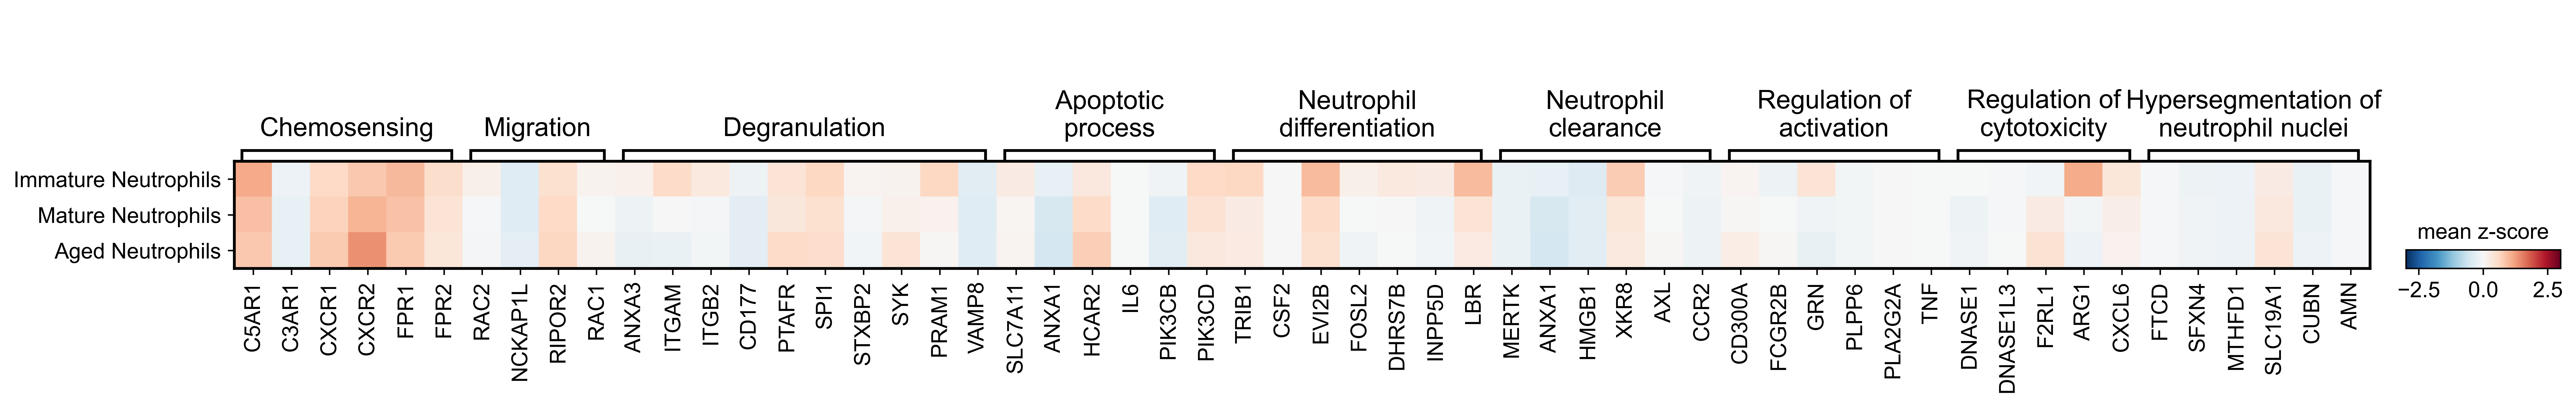

In [16]:
# Extra

chemosensing = ["C5AR1", "C3AR1", "CXCR1", "CXCR2", "FPR1", "FPR2"]
migration = ["RAC2", "NCKAP1L", "RIPOR2", "RAC1"]

degranulation = ["ANXA3", "ITGAM", "ITGB2", "CD177", "PTAFR", "SPI1", "STXBP2", "SYK", "PRAM1", "VAMP8"] 
apoptotic_process = ["SLC7A11", "ANXA1", "HCAR2", "IL6", "PIK3CB", "PIK3CD"] 
neutrophil_differentiation = ["TRIB1", "CSF2", "EVI2B", "FOSL2", "DHRS7B", "INPP5D", "LBR" ]
neutrophil_clearance = ["MERTK", "ANXA1", "HMGB1", "XKR8", "AXL", "CCR2"]

regulation_of_activation = ["CD300A", "FCGR2B", "GRN", "PLPP6", "PLA2G2A", "TNF"]
regulation_of_cytotoxicity = ["DNASE1", "DNASE1L3", "F2RL1", "ARG1", "CXCL6"]

hypersegmentation_of_neutrophil_nuclei = ["FTCD", "SFXN4", "MTHFD1", "SLC19A1", "CUBN", "AMN"]
impaired_bactericidal_activity = ["CEBPE", "LYST", "CYBA", "CYBB", "GPI", "IRF8", "NCF2", "RAC2", "NCF1", "CYBC1", "SPPL2A"]

biological_processes = {
    "Chemosensing": chemosensing,
    "Migration": migration,
    "Degranulation": degranulation,
    "Apoptotic\nprocess": apoptotic_process,
    "Neutrophil\ndifferentiation": neutrophil_differentiation,
    "Neutrophil\nclearance" : neutrophil_clearance,
    "Regulation of\nactivation": regulation_of_activation,
    "Regulation of\ncytotoxicity": regulation_of_cytotoxicity,
    "Hypersegmentation of\nneutrophil nuclei": hypersegmentation_of_neutrophil_nuclei,

}


import matplotlib


for subset, mask, cohort in zip(neutrophils_subset, neutrophils_masks, cohorts_subset):

    adata_neutrophils = adata[mask].copy() 

    fig = sc.pl.matrixplot(
        adata_neutrophils,
        biological_processes,
        categories_order = subset[::-1],
        groupby = "cell_type_sub_prolif_anno",
        dendrogram=False,
        vmin = -3,
        vmax = 3,
        cmap="RdBu_r",

        var_group_rotation = 0,
        layer="scaled",
        colorbar_title = "mean z-score",
        return_fig = True  
    )
    
    axes_dict = fig.get_axes()
    
    mainplot_ax = axes_dict["mainplot_ax"]
    color_legend_ax = axes_dict["color_legend_ax"]
    gene_group_ax = axes_dict["gene_group_ax"]
    
    for child in mainplot_ax.get_children():
        if isinstance(child, matplotlib.collections.PolyQuadMesh):
            child.set_edgecolor("face")  
            child.set_linewidth(0.5)  
    
    for ax in axes_dict.values():
        ax.grid(False) 
    
    plt.savefig(f"figures/final/matrixplot_{cohort}_neutrophils_biological_processes_zscore_v6.pdf", transparent = True, bbox_inches="tight")
    

In [13]:
# 
neutrophils = [
"Aged Neutrophils",
"Mature Neutrophils",
"Immature Neutrophils",
"Early Immature Neutrophils",
"Precursors of Neutrophils"
]

neutrophils_HD = [
"Aged Neutrophils",
"Mature Neutrophils",
"Immature Neutrophils"
]


neutrophils_subset = [neutrophils, neutrophils, neutrophils, neutrophils_HD]

neutrophils_masks = [(adata.obs["cell_type_sub_prolif_anno"].isin(neutrophils)) & ((adata.obs["sample"] == "GF") | (adata.obs["sample"] == "KC")),
                    (adata.obs["cell_type_sub_prolif_anno"].isin(neutrophils)) & ((adata.obs["sample"] == "GF")),
                    (adata.obs["cell_type_sub_prolif_anno"].isin(neutrophils)) & ((adata.obs["sample"] == "UL")),
                    (adata.obs["cell_type_sub_prolif_anno"].isin(neutrophils_HD)) & ((adata.obs["sample"] == "KC"))]

cohorts_subset = ["only_GCSF_and_HD", "only_GCSF", "only_AML", "only_HD"]


neutrophils_marker_genes_dicts = [neutrophils_marker_genes_dict, neutrophils_marker_genes_dict, neutrophils_marker_genes_dict, neutrophils_marker_genes_dict_HD]

/Users/denis/mambaforge/envs/capseq_dge/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/var/folders/sv/fwsrf8xs57jd9rtwwfxmyxg80000gn/T/ipykernel_9772/3775968726.py:173: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


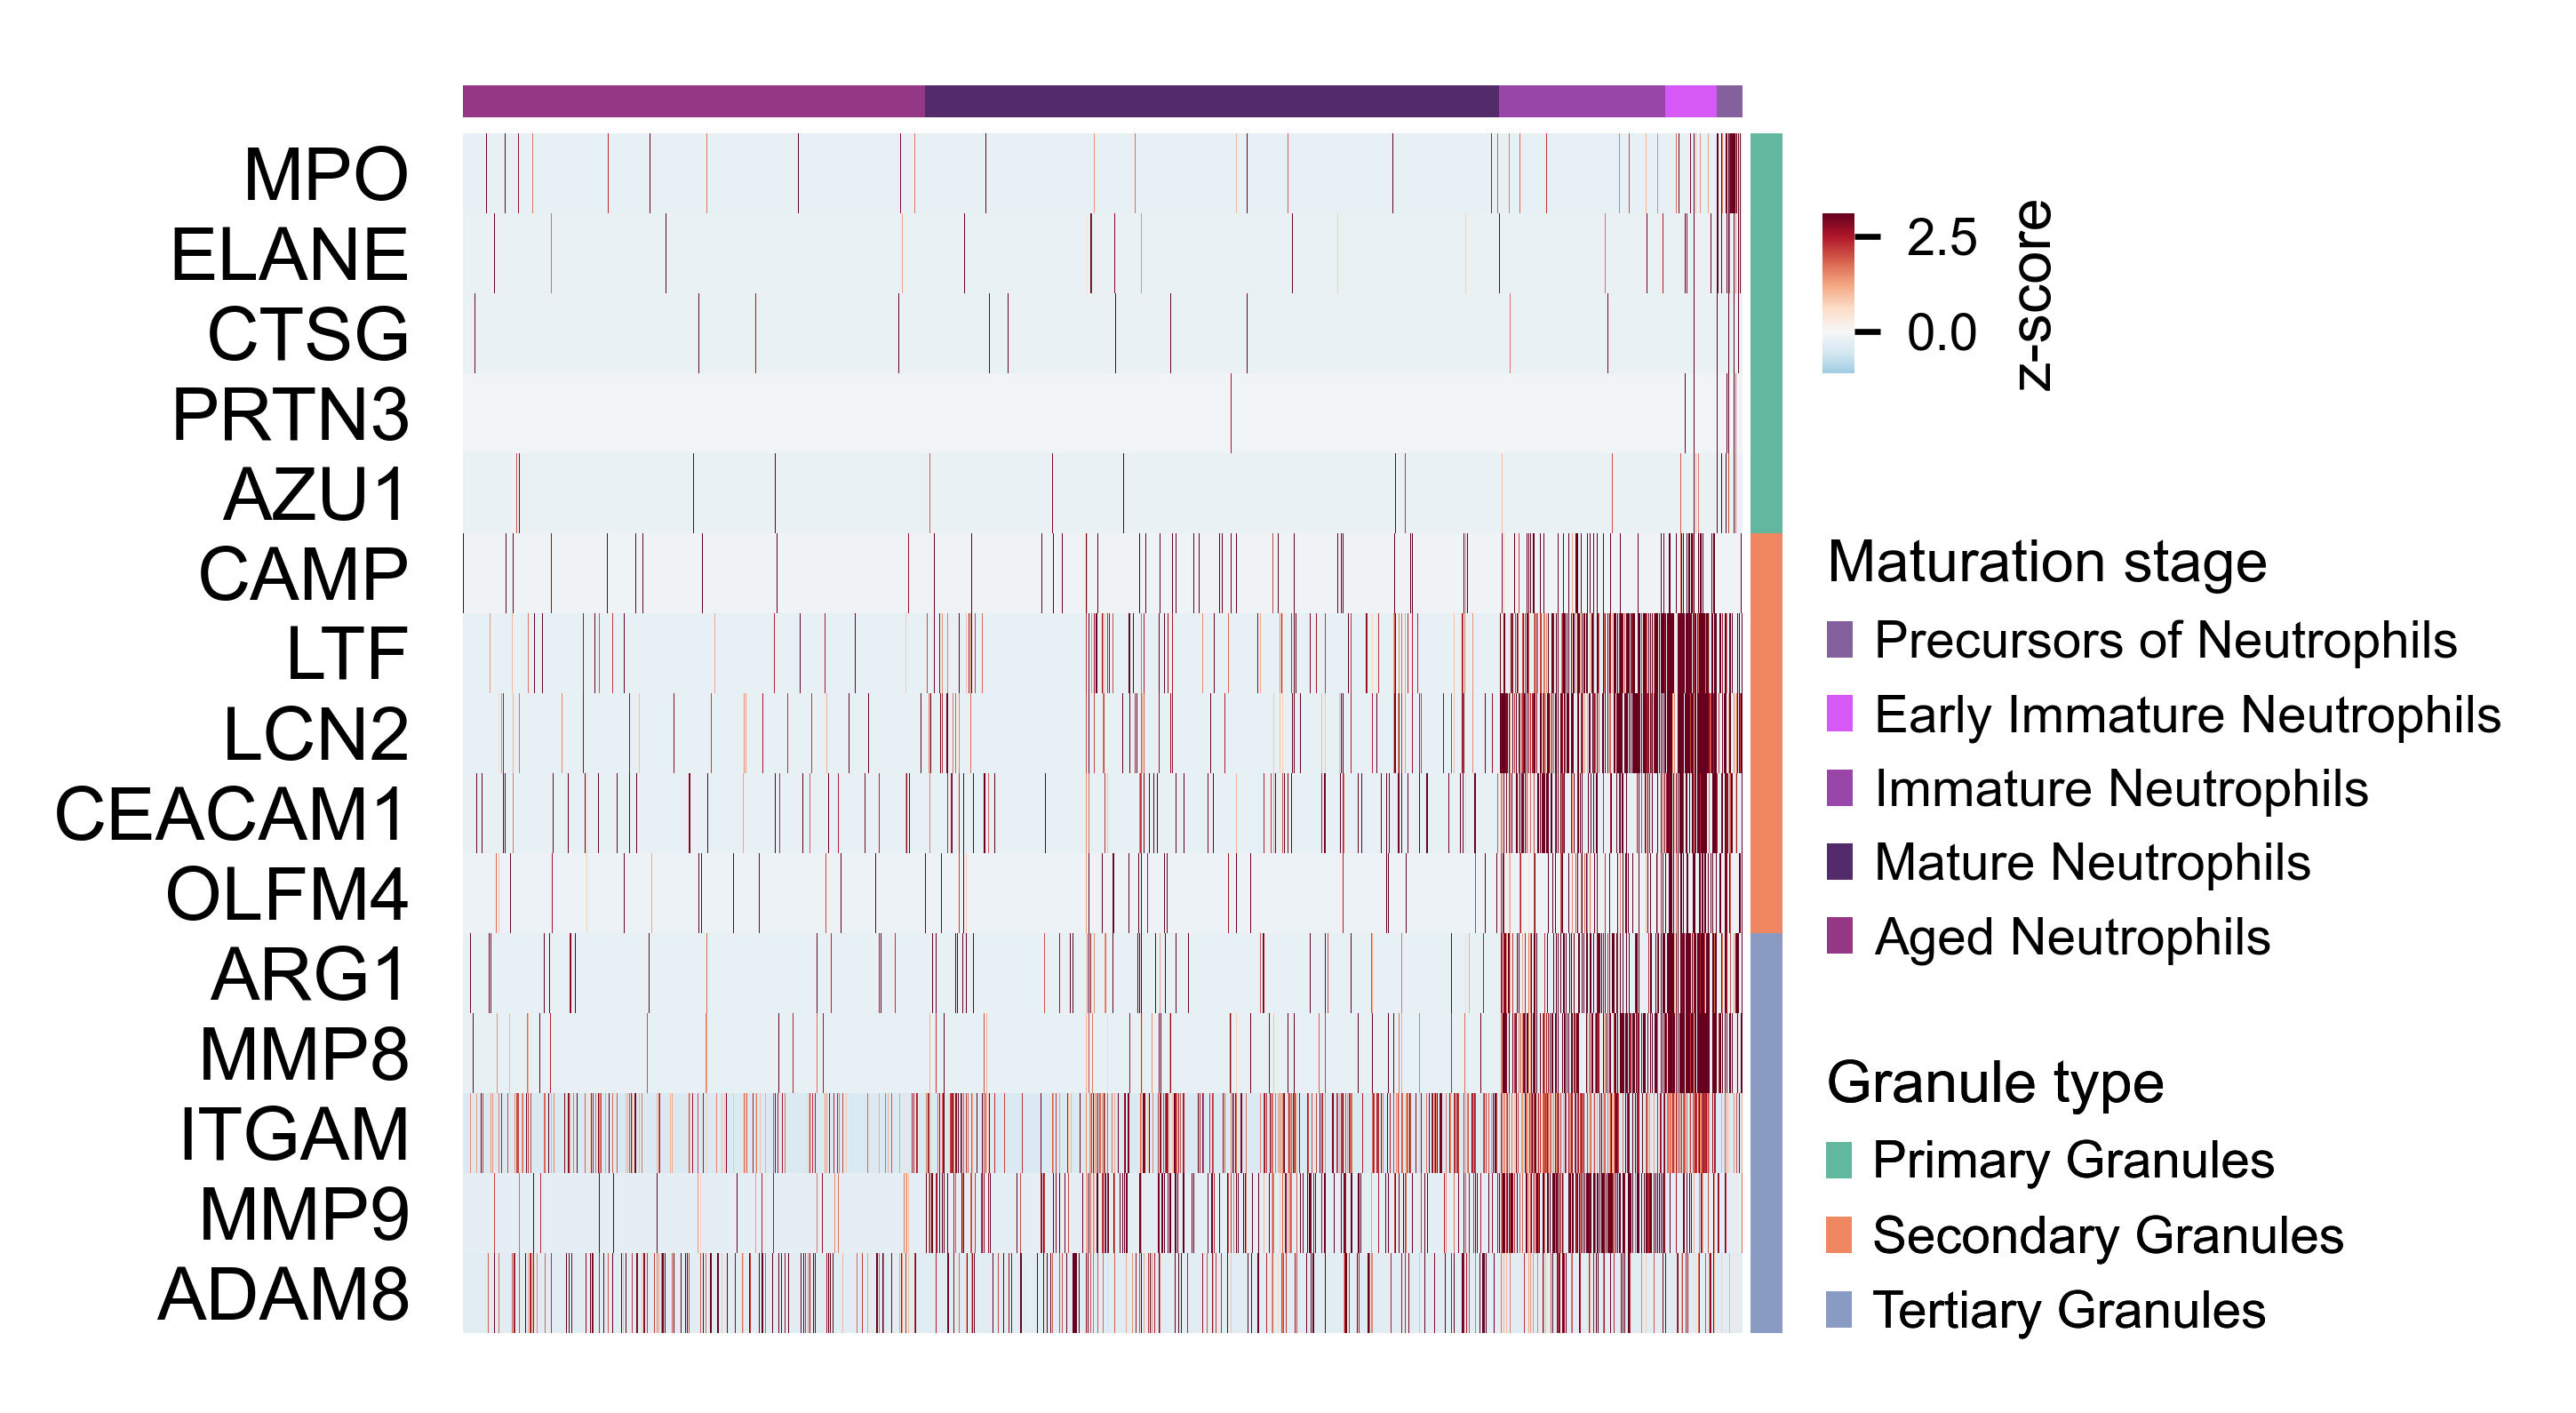

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


primary_granules = ["MPO", "ELANE", "CTSG", "PRTN3", "AZU1"]
secondary_granules = ["CAMP", "LTF", "LCN2", "CEACAM1", "OLFM4"]
tertiary_granules = ["ARG1", "MMP8", "ITGAM", "MMP9", "ADAM8"]

all_genes = primary_granules + secondary_granules + tertiary_granules

adata_neutrophils = adata[neutrophils_masks[0]].copy() 
adata_neutrophils.obs["cell_type_sub_prolif_anno"] = pd.Categorical(adata_neutrophils.obs["cell_type_sub_prolif_anno"], categories=subset, ordered=True)


expression_matrix = adata_neutrophils[:, all_genes].layers["scaled"].toarray()
df_exp = pd.DataFrame(
    expression_matrix,
    index=adata_neutrophils.obs_names,  
    columns=all_genes                   
)

df_exp["cluster"] = adata_neutrophils.obs["cell_type_sub_prolif_anno"].values

df_exp_sorted = df_exp.sort_values(by="cluster")

df_numeric = df_exp_sorted.drop(columns=["cluster"]).transpose()

cell_type_color_palette = {
    "Precursors of Neutrophils": "#84619c",
    "Early Immature Neutrophils": "#d658f5",
    "Immature Neutrophils": "#9846a8",
    "Mature Neutrophils": "#532b6b",
    "Aged Neutrophils": "#943886"
}

granule_color_palette = {
    "Primary Granules": "#61b89e",    
    "Secondary Granules": "#ef8860", 
    "Tertiary Granules": "#899bc2"   
}

df_exp_sorted["cluster"] = df_exp_sorted["cluster"].astype(str)  
col_colors = df_exp_sorted["cluster"].map(cell_type_color_palette).values 

row_colors = [
    granule_color_palette["Primary Granules"] if gene in primary_granules else
    granule_color_palette["Secondary Granules"] if gene in secondary_granules else
    granule_color_palette["Tertiary Granules"] if gene in tertiary_granules else "white"
    for gene in df_numeric.index
]


g = sns.clustermap(
    df_numeric,
    cmap="RdBu_r",
    robust=True,
    center=0,
    vmin = -1.1,
    vmax = 3.1,
    figsize=(3, 3),              
    xticklabels=False,            
    yticklabels=False,            
    row_cluster=False,            
    col_cluster=False,            
    col_colors=col_colors,        
    row_colors=row_colors,        
    linewidths=0                  
)

g.fig.subplots_adjust(left=0.05, right=0.93, top=0.9, bottom=0.1)
g.ax_heatmap.set_position([0.05, 0.1, 0.8, 0.75]) 
g.ax_col_colors.set_position([0.05, 0.86, 0.8, 0.02])
g.ax_row_colors.set_position([0.855, 0.1, 0.02, 0.75]) 

g.cax.set_position([0.9, 0.7, 0.02, 0.1])
g.cax.grid(False)
g.cax.tick_params(labelsize=7) 
g.cax.set_ylabel("z-score", fontsize=8)  


ax = g.ax_heatmap
ax.set_yticks(np.arange(len(df_numeric.index)) + 0.5) 
ax.set_yticklabels(df_numeric.index, rotation=0, fontsize=10)
ax.yaxis.tick_left()

ax.tick_params(axis="y", which="both", left=False)
ax.grid(False) 


legend_elements_cell_types = [
    Patch(facecolor=color, edgecolor="none", label=cell_type)
    for cell_type, color in cell_type_color_palette.items()
]

legend_elements_granules = [
    Patch(facecolor=color, edgecolor="none", label=granule)
    for granule, color in granule_color_palette.items()
]


cell_type_legend = plt.legend(
    handles=legend_elements_cell_types,
    bbox_to_anchor=(22.7, -0.75), 
    ncol=1,
    title="Maturation stage",
    fontsize=7,
    title_fontsize=8,
    frameon=False  
)

cell_type_legend._legend_box.align = "left"


granule_legend = plt.legend(
    handles=legend_elements_granules,
    bbox_to_anchor=(17.8, -4), 
    ncol=1,
    title="Granule type",
    fontsize=7,
    title_fontsize=8,
    frameon=False  
)

granule_legend._legend_box.align = "left"


g.fig.add_artist(cell_type_legend)
g.fig.add_artist(granule_legend)


g.ax_heatmap.set_xlabel("")
g.ax_heatmap.set_ylabel("")
plt.tight_layout()


for artist in g.ax_heatmap.get_children():
    if isinstance(artist, plt.matplotlib.collections.QuadMesh):  
        artist.set_rasterized(True)

for artist in g.ax_col_colors.get_children():
    artist.set_rasterized(True)  

for artist in g.ax_row_colors.get_children():
    artist.set_rasterized(True) 


plt.savefig(f"figures/final/heatmap_{cohorts_subset[0]}_neutrophils_granules_cells_zscore_v1.pdf", 
            transparent=True, bbox_inches="tight", dpi=600)

plt.show()
